In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# load the data (encoding='latin1' important for IMDb for data)
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')
print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [38]:
# only remove the rows
df.dropna(inplace=True)

# 'Year' and 'Duration' put into the number
df['Year'] = df['Year'].str.extract('(\d+)').astype(int)
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)

# 'Votes' change the commas of vote and change into the number
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

print("Data cleaning complete!")

Data cleaning complete!


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3152531332.py:5: SyntaxWarning: invalid escape sequence '\d'
  df['Year'] = df['Year'].str.extract('(\d+)').astype(int)
/tmp/ipython-input-3152531332.py:6: SyntaxWarning: invalid escape sequence '\d'
  df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)


In [39]:
# take the Genre and Director average rating and make it feature
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_mean_rating'] = director_mean_rating

# select the Features
X = df[['Year', 'Duration', 'Votes', 'Genre_mean_rating', 'Director_mean_rating']]
y = df['Rating']

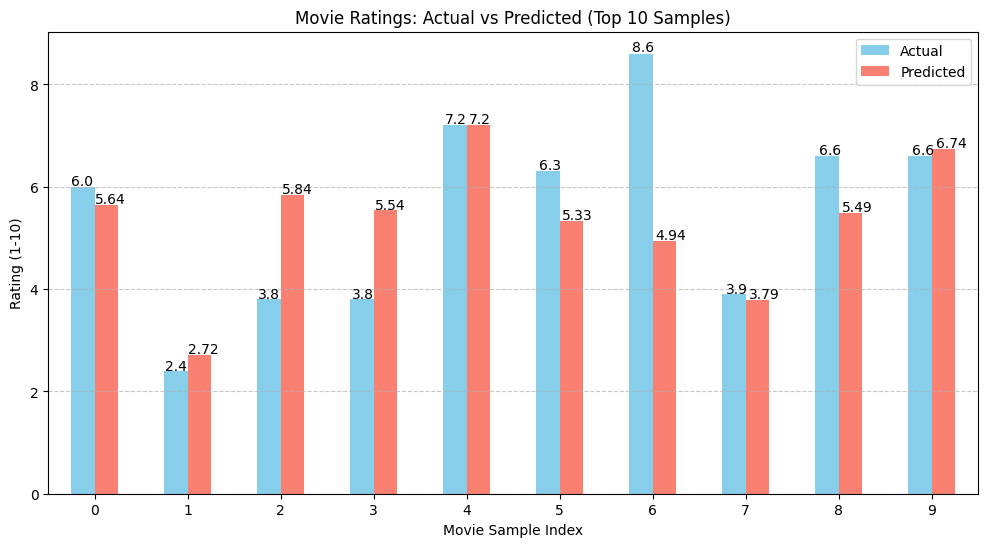

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. first take 10 movies data for comparison it
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred}).head(10)

# 2. plot the Bar graph
ax = comparison_df.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])

plt.title('Movie Ratings: Actual vs Predicted (Top 10 Samples)')
plt.xlabel('Movie Sample Index')
plt.ylabel('Rating (1-10)')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# for displaying numbers at Bar graph
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()